### Final Project - CSCI 347
#### Mason Reyher

EDA:

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.api.types as types

In [127]:
# read initial csv

df = pd.read_csv('hcc-data.csv')
df.columns = ['alcohol','hep B surface antigen', 'heb B e antigen', 'hep B core antibody', 'hep C virus antibody',
              'cirrhosis', 'endemic countries', 'smoking', 'diabetes', 'obesity', 'hemochromatosis', 'arterial hypertension',
              'chronic renal insufficiency', 'HIV', 'nonalcoholic steatohepatitis', 'esophageal varices', 'splenomegaly',
              'nan_1', 'portal hypertension', 'nan_2', 'portal vein thrombosis', 'liver metastasis', 'radiological hallmark', 'age at diagnosis',
              'grams of alcohol/day', 'packs of cigarettes/year', 'performance status', 'encephalopathy degree', 'ascites degree',
              'international normalized ratio', 'alpha-fetoprotein (ng/mL)', 'hemoglobin (g/dL)', 'mean corpususcular volume (fl)',
              'leukocytes (G/L)', 'platelets (G/L)', 'albumin (mg/dL)', 'total bilirubin (mg/dL)', 'alanine transaminase (U/L)',
              'aspartate transaminase (U/L)', 'gamma glutamyl transferase (U/L)', 'alkaline phosphatase (U/L)', 'total proteins (g/dL)',
              'creatinine (mg/dL)', 'nodules', 'dimenison of nodule (cm)', 'direct bilirubin (mg/dL)', 'iron (mcg/dL)', 'oxygen saturation (%)',
              'ferritin (ng/mL)', 'class (1=lives, 0=dies)']
df.head()
df.shape

(164, 50)

In [90]:
# create dataframe of missing values/percentages

i = df.select_dtypes(exclude=['number']).apply(lambda x: x.str.contains('\?')) 
missing = df.isnull().sum()
total = df.isnull().count()
bad_df = pd.DataFrame({'null count': missing, '%':round(missing / total * 100, 1)})
bad_df

,null count,%
alcohol,0,0.0
hep B surface antigen,18,11.0
heb B e antigen,0,0.0
hep B core antibody,17,10.4
hep C virus antibody,39,23.8
cirrhosis,24,14.6
endemic countries,9,5.5
smoking,0,0.0
diabetes,39,23.8
obesity,41,25.0


In [91]:
# drop fields with more than 25% missing values

bad_names = ['nan_2']
for idx, name in enumerate(df):
    if bad_df['%'][idx] > 25:
        bad_names.append(name)
df = df.drop(bad_names, axis=1)
df.head()
df.columns

Index(['alcohol', 'hep B surface antigen', 'heb B e antigen',
       'hep B core antibody', 'hep C virus antibody', 'cirrhosis',
       'endemic countries', 'smoking', 'diabetes', 'obesity',
       'hemochromatosis', 'arterial hypertension',
       'chronic renal insufficiency', 'HIV', 'nonalcoholic steatohepatitis',
       'esophageal varices', 'splenomegaly', 'portal hypertension',
       'portal vein thrombosis', 'liver metastasis', 'radiological hallmark',
       'age at diagnosis', 'performance status', 'encephalopathy degree',
       'ascites degree', 'international normalized ratio',
       'alpha-fetoprotein (ng/mL)', 'hemoglobin (g/dL)',
       'mean corpususcular volume (fl)', 'leukocytes (G/L)', 'platelets (G/L)',
       'albumin (mg/dL)', 'total bilirubin (mg/dL)',
       'alanine transaminase (U/L)', 'aspartate transaminase (U/L)',
       'gamma glutamyl transferase (U/L)', 'alkaline phosphatase (U/L)',
       'total proteins (g/dL)', 'creatinine (mg/dL)', 'nodules',
     

In [92]:
# fill in missing values using forward fill (and back fill)
#bfill is only used to fill in the first row after ffill fills in everything else
df = df.ffill(axis = 0)
df = df.bfill(axis = 0)
df

,alcohol,hep B surface antigen,heb B e antigen,hep B core antibody,hep C virus antibody,cirrhosis,endemic countries,smoking,diabetes,obesity,...,total bilirubin (mg/dL),alanine transaminase (U/L),aspartate transaminase (U/L),gamma glutamyl transferase (U/L),alkaline phosphatase (U/L),total proteins (g/dL),creatinine (mg/dL),nodules,dimenison of nodule (cm),"class (1=lives, 0=dies)"
0,0,0.0,0,0.0,0.0,0.0,1.0,1,0.0,1.0,...,0.4,58.0,68.0,202.0,109.0,7.0,2.10,1.0,1.8,1
1,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,1
2,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0
3,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,1
4,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,3.5,91.0,122.0,242.0,396.0,5.6,0.90,1.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0,0.0,1,1.0,0.0,1.0,1.0,1,0.0,1.0,...,0.5,35.0,40.0,449.0,109.0,7.6,0.70,5.0,3.0,1
160,0,1.0,0,1.0,0.0,1.0,1.0,1,0.0,0.0,...,3.6,50.0,91.0,147.0,280.0,6.7,0.70,1.0,2.2,0
161,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,0.6,53.0,52.0,164.0,181.0,7.5,1.46,5.0,18.6,1
162,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,1.1,50.0,60.0,320.0,170.0,8.4,0.74,5.0,18.0,0


C:\Users\meyher\AppData\Local\Temp\ipykernel_14332\886606410.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(col, figsize=(3,3))


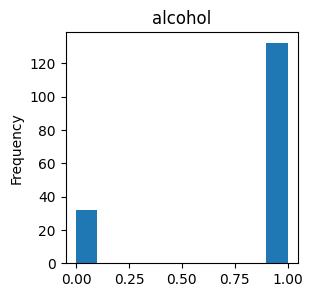

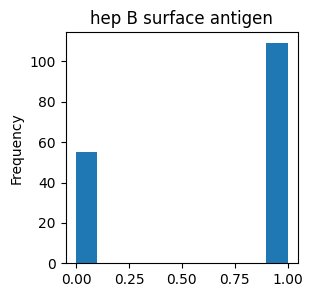

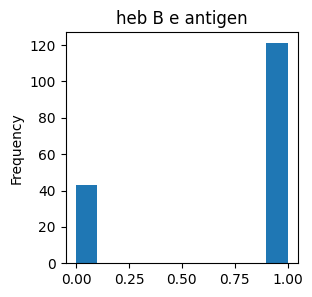

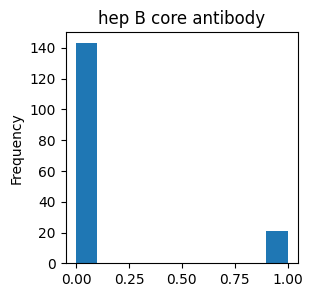

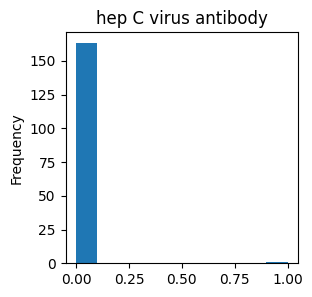

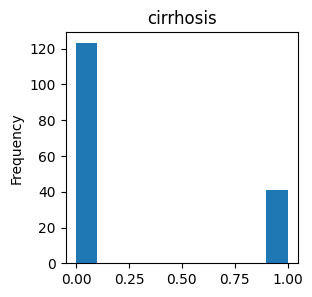

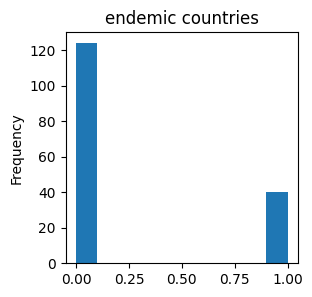

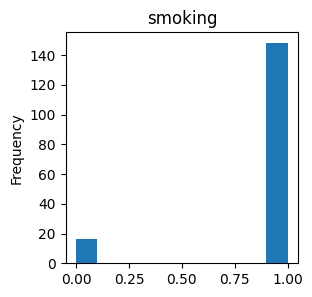

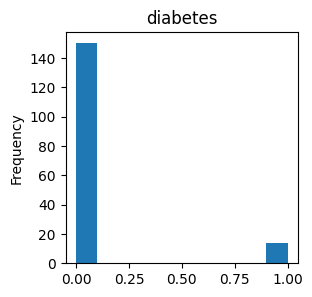

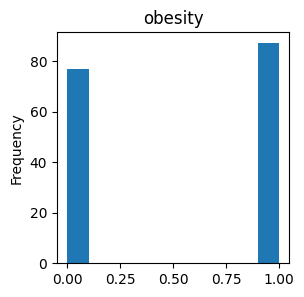

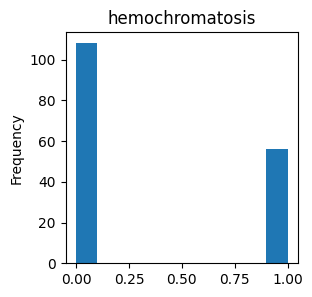

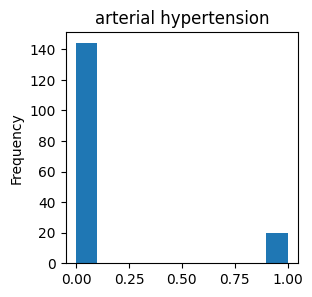

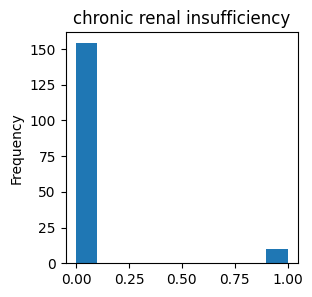

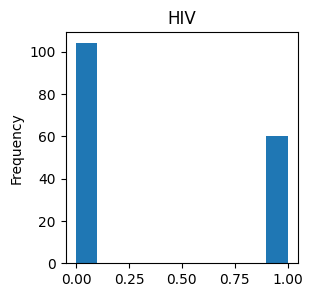

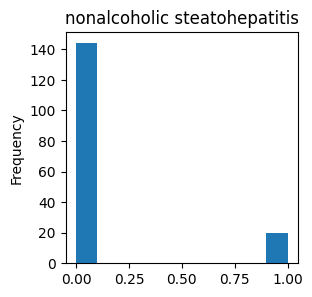

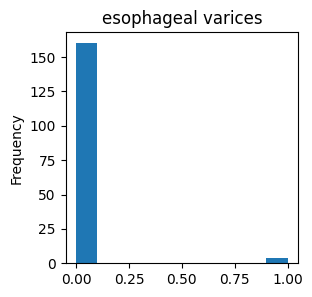

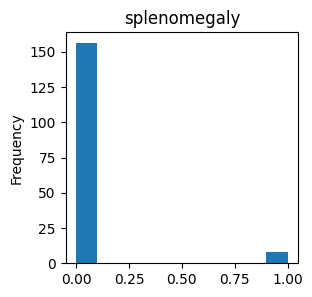

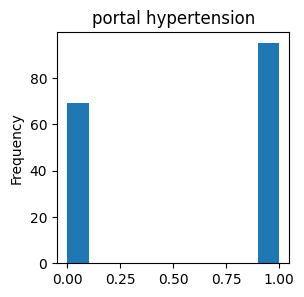

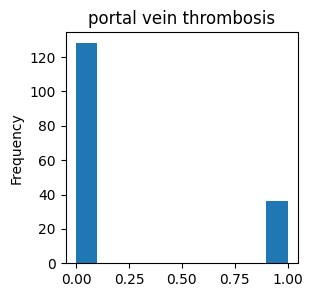

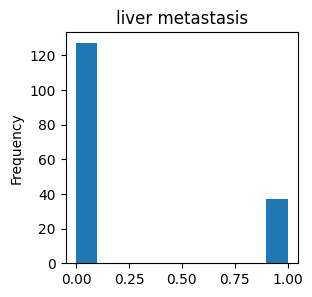

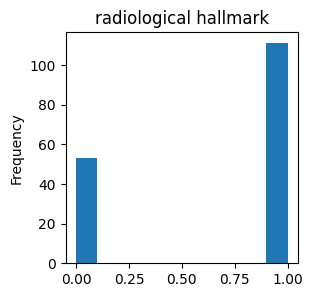

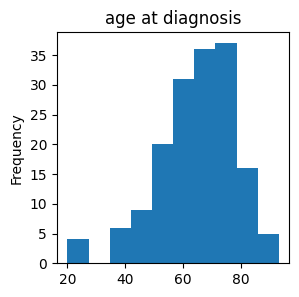

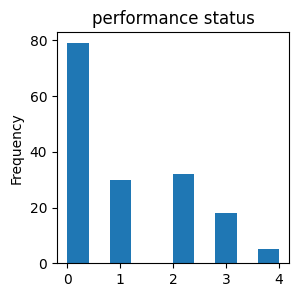

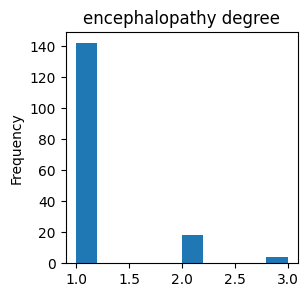

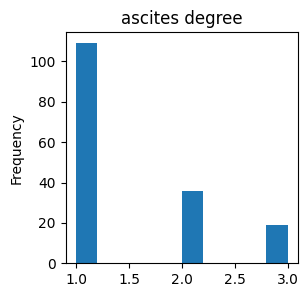

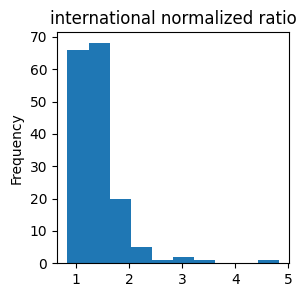

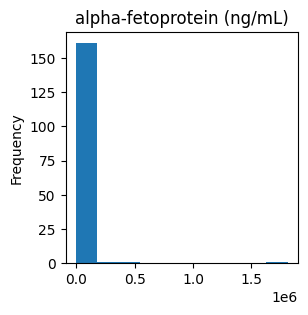

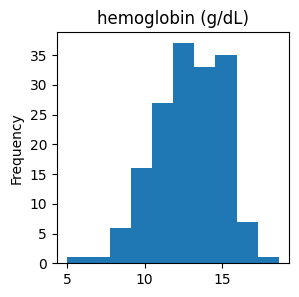

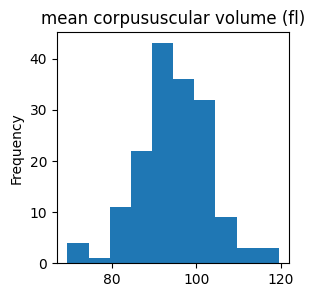

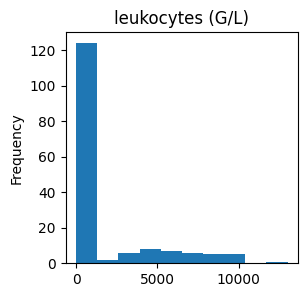

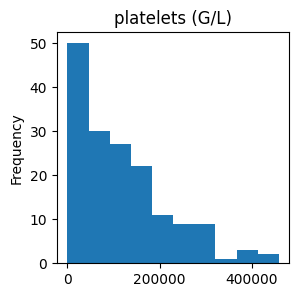

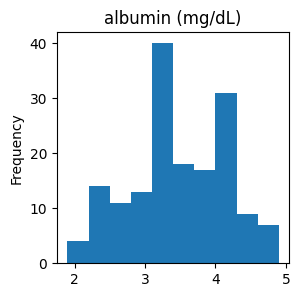

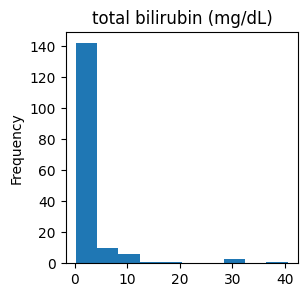

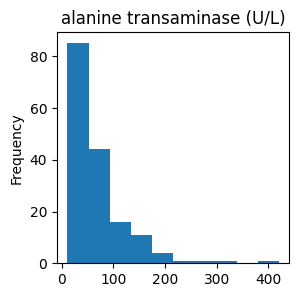

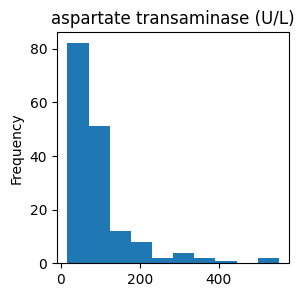

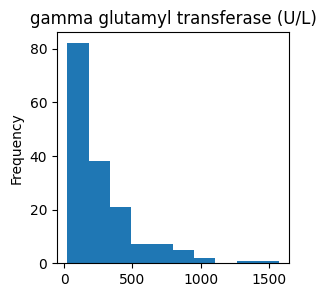

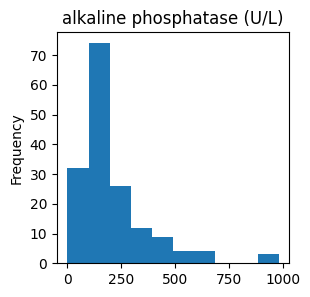

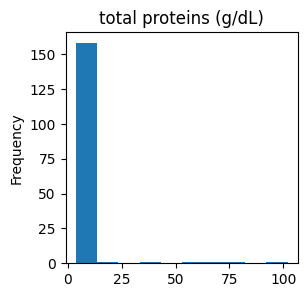

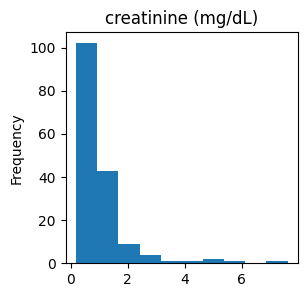

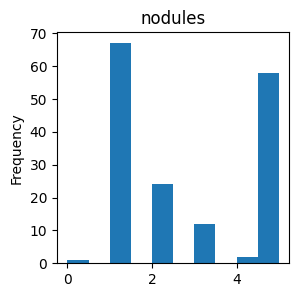

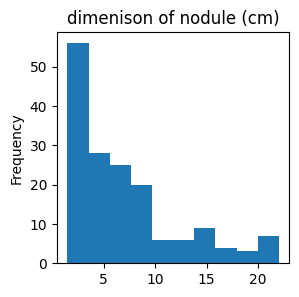

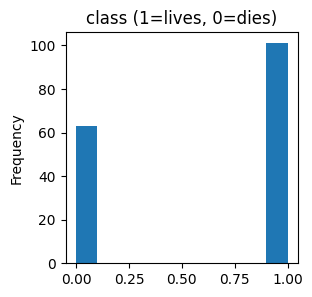

In [93]:
# histogram modeling to view outliers

for col in df:
    plt.figure(col, figsize=(3,3))
    plt.title(col)
    if types.is_numeric_dtype(df[col]):
        df[col].plot(kind = 'hist')
    elif types.is_string_dtype(df[col]):
        df[col].value_counts()[:10].plot(kind = 'bar')

(147, 42)

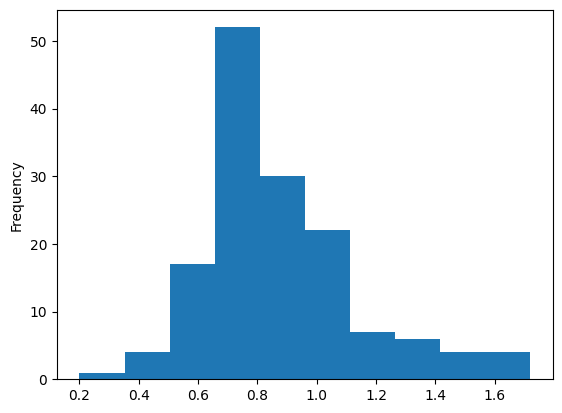

In [94]:
# to limit outliers (only present in some fields), we use df.quantile()
# we will use the creatinine field to limit outliers, as this field seems to have the largest right-skew

# 90% of values
max_val = df['creatinine (mg/dL)'].quantile(0.9)
df = df[df['creatinine (mg/dL)'] < max_val]
df['creatinine (mg/dL)'].plot(kind = 'hist')
df.shape
# from the shape we can see we've gotten rid of ~40 rows of data, 
# and the creatinine distribution is much more normalized now.

In [95]:
df.info()
# all values are numerical. Time to model.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 2 to 162
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   alcohol                           147 non-null    int64  
 1   hep B surface antigen             147 non-null    float64
 2   heb B e antigen                   147 non-null    int64  
 3   hep B core antibody               147 non-null    float64
 4   hep C virus antibody              147 non-null    float64
 5   cirrhosis                         147 non-null    float64
 6   endemic countries                 147 non-null    float64
 7   smoking                           147 non-null    int64  
 8   diabetes                          147 non-null    float64
 9   obesity                           147 non-null    float64
 10  hemochromatosis                   147 non-null    float64
 11  arterial hypertension             147 non-null    float64
 12  chronic 

Modeling:

In [96]:
# separate labels
x_data = df.iloc[:, :-1]
# the goal of this model is to predict the class label.
y_data = df['class (1=lives, 0=dies)']

In [97]:
from sklearn.model_selection import train_test_split as tts 

x_train, x_test, y_train, y_test = tts(x_data, y_data, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
# 84 values will be used for training, 22 will be used for testing.

(117, 41) (30, 41) (117,) (30,)


In [124]:
from sklearn.linear_model import LogisticRegression

# fit the lin reg model

reg = LogisticRegression(max_iter=200).fit(x_train,y_train)
pred = reg.predict(x_test)


C:\Users\meyher\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7666666666666667


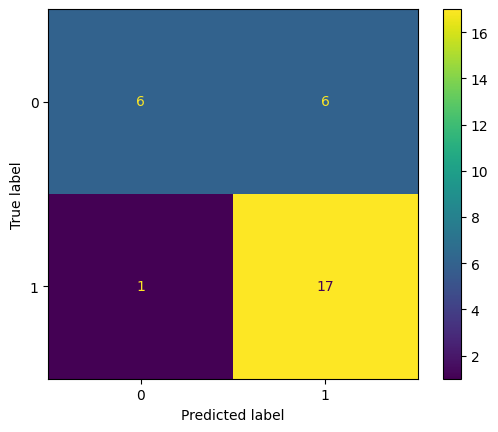

In [126]:
from sklearn import metrics

# plot confusion matrix to assess accuracy, precision, recall etc.
cm = metrics.confusion_matrix(y_test, pred, labels=reg.classes_)
display = metrics.ConfusionMatrixDisplay(cm, display_labels=reg.classes_)
display.plot()
print(f'Accuracy: {metrics.accuracy_score(y_test, pred)}')